In [1]:
import os
import cv2
from torchvision import datasets
import torchvision
import torch
import imutils
from torchvision.transforms import transforms
import torchvision.models as models
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils.video import VideoStream
Image.LOAD_TRUNCATED_IMAGES = True
plt.ion()

c:\Users\gf63\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\gf63\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\gf63\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
print("[INFO] loading model...")
model = torch.load('./trained-models/model_final.pth')
#model.eval()

[INFO] loading model...


In [3]:
class_names = class_names = ['Fire', 'Neutral', 'Smoke']

def predict(image):
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    image = image.cuda()

    pred = model(image)
    idx = torch.argmax(pred)
    prob = pred[0][idx].item()*100
    
    return class_names[idx], prob

## Image

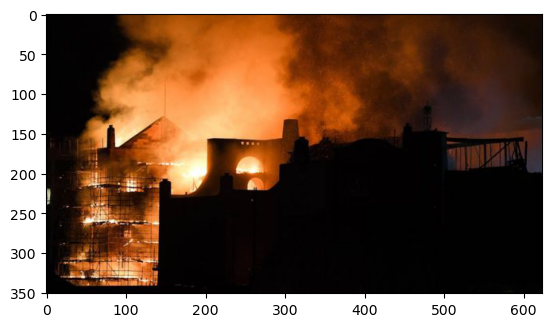

Fire 98.85496497154236


In [14]:
img = Image.open(r'C:\Users\gf63\Downloads\Fire-Smoke-Detection-master\Fire-Smoke-Detection-master\test-imgs\7.jpg')
plt.imshow(img)
plt.show()

prediction, prob = predict(img)
print(prediction, prob)

## Video

In [16]:
cap = cv2.VideoCapture('videoplayback (2).mp4')

while True:

    ret, image = cap.read()
    
    draw = image.copy()
    draw = cv2.resize(draw,(640,480))
    
    draw = transforms.ToPILImage()(draw)
    prediction, prob = predict(draw)
    
    if prediction == 'Neutral':
        color = (0, 255, 0)
    else:
        color = (0, 0, 255)
    cv2.putText(image, (prediction+' '+str(prob)), (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    

    cv2.imshow('framename', image)
        
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()